In [1]:
# importing necessary libraries

import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\kishan'pc\Desktop\tennis record.csv") # loading datasets

In [4]:
df = df.drop('Unnamed: 0', axis = 1) # dropping uncessary index

In [5]:
df # inspecting data

tourney_id tourney_name surface  draw_size tourney_level tourney_date  \
0      2000-807  Mexico City    Clay         32             A   21-02-2000   
1      2000-359       Bogota    Clay         32             A     6/3/2000   
2      2000-359       Bogota    Clay         32             A     6/3/2000   
3      2000-409      Atlanta    Clay         32             A    10/4/2000   
4      2000-409      Atlanta    Clay         32             A    10/4/2000   
...         ...          ...     ...        ...           ...          ...   
1839  2021-0425    Barcelona    Clay         64             A   19-04-2021   
1840  2021-0425    Barcelona    Clay         64             A   19-04-2021   
1841  2021-0425    Barcelona    Clay         64             A   19-04-2021   
1842  2021-0425    Barcelona    Clay         64             A   19-04-2021   
1843  2021-0425    Barcelona    Clay         64             A   19-04-2021   

      match_num  winner_id  Player_seed  Result of the game  ... Player_age  \
0            28     102644            7                   1  ...  24.501027   
1            27     102950            4                   1  ...  22.995209   
2            30     101962            2                   1  ...  28.481862   
3            30     102776            8                   1  ...  23.978097   
4            28     102776            8                   1  ...  23.978097   
...         ...        ...          ...                 ...  ...        ...   
1839        296     106043            4                   0  ...  28.673511   
1840        298     206173           11                   0  ...  19.674196   
1841        299     105807            6                   0  ...  29.771389   
1842        300     126774            2                   0  ...  22.685832   
1843        286     200282           14                   0  ...  22.168378   

      N_ace w_df  w_svpt  w_1stIn  w_1stWon  w_2ndWon  w_SvGms  w_bpSaved  \
0       6.0  7.0    66.0     38.0      31.0      10.0     11.0        1.0   
1       1.0  0.0    34.0     18.0      17.0      11.0      7.0        0.0   
2       8.0  8.0    93.0     53.0      41.0      16.0     15.0        4.0   
3       4.0  5.0    77.0     35.0      24.0      25.0     12.0        3.0   
4       5.0  5.0    84.0     40.0      32.0      25.0     11.0        4.0   
...     ...  ...     ...      ...       ...       ...      ...        ...   
1839    0.0  4.0   102.0     70.0      44.0      13.0     15.0        5.0   
1840    1.0  2.0    54.0     28.0      16.0      15.0      9.0        7.0   
1841    4.0  1.0    53.0     44.0      24.0       3.0      8.0        6.0   
1842    5.0  3.0   120.0     74.0      55.0      20.0     17.0        8.0   
1843    1.0  0.0    52.0     29.0      20.0      14.0     10.0        2.0   

      w_bpFaced  
0           5.0  
1           0.0  
2          10.0  
3           5.0  
4           5.0  
...         ...  
1839       10.0  
1840       10.0  
1841       10.0  
1842       12.0  
1843        5.0  

[1844 rows x 23 columns]

In [6]:
df.describe(include = 'all') # describing all numerical and categorical data

tourney_id tourney_name surface    draw_size tourney_level  \
count        1844         1844    1844  1844.000000          1844   
unique        312           45       1          NaN             1   
top      2009-425    Barcelona    Clay          NaN             A   
freq           24          276    1844          NaN          1844   
mean          NaN          NaN     NaN    36.659436           NaN   
std           NaN          NaN     NaN    10.290573           NaN   
min           NaN          NaN     NaN    28.000000           NaN   
25%           NaN          NaN     NaN    32.000000           NaN   
50%           NaN          NaN     NaN    32.000000           NaN   
75%           NaN          NaN     NaN    48.000000           NaN   
max           NaN          NaN     NaN    64.000000           NaN   

       tourney_date    match_num      winner_id  Player_seed  \
count          1844  1844.000000    1844.000000  1844.000000   
unique          222          NaN            NaN          NaN   
top      19-07-2004          NaN            NaN          NaN   
freq             28          NaN            NaN          NaN   
mean            NaN    81.120390  105053.610087     4.816703   
std             NaN   103.986547    8392.649765     3.295539   
min             NaN    21.000000  100644.000000     1.000000   
25%             NaN    26.000000  103476.500000     2.000000   
50%             NaN    30.500000  104022.000000     4.000000   
75%             NaN    47.000000  104745.000000     7.000000   
max             NaN   507.000000  210013.000000    17.000000   

        Result of the game  ...   Player_age        N_ace         w_df  \
count          1844.000000  ...  1844.000000  1814.000000  1814.000000   
unique                 NaN  ...          NaN          NaN          NaN   
top                    NaN  ...          NaN          NaN          NaN   
freq                   NaN  ...          NaN          NaN          NaN   
mean              0.500000  ...    26.405031     3.810364     2.426681   
std               0.500136  ...     3.484937     3.463844     2.078406   
min               0.000000  ...    17.130732     0.000000     0.000000   
25%               0.000000  ...    23.843943     1.000000     1.000000   
50%               0.500000  ...    26.325804     3.000000     2.000000   
75%               1.000000  ...    28.709103     5.000000     3.000000   
max               1.000000  ...    37.155373    28.000000    19.000000   

             w_svpt      w_1stIn     w_1stWon     w_2ndWon      w_SvGms  \
count   1814.000000  1814.000000  1814.000000  1814.000000  1814.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      73.799890    45.918412    31.295480    13.963616    11.349504   
std       23.488956    15.925120    11.224177     6.062626     3.117165   
min        8.000000     3.000000     1.000000     1.000000     1.000000   
25%       56.000000    34.000000    23.000000    10.000000     9.000000   
50%       70.000000    44.000000    30.000000    13.000000    11.000000   
75%       89.000000    56.000000    38.000000    18.000000    14.000000   
max      192.000000   138.000000    84.000000    48.000000    27.000000   

          w_bpSaved    w_bpFaced  
count   1814.000000  1814.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean       4.117420     6.921720  
std        3.094039     4.118413  
min        0.000000     0.000000  
25%        2.000000     4.000000  
50%        4.000000     7.000000  
75%        6.000000    10.000000  
max       23.000000    28.000000  

[11 rows x 23 columns]

In [7]:
numerical_col = list(df.select_dtypes(include=['number']).columns) # Listing numerical columns

categorical_columns = list(df.select_dtypes(include=['object', 'category']).columns) # Listing Categorical columns

In [8]:
numerical_col

['draw_size',
 'match_num',
 'winner_id',
 'Player_seed',
 'Result of the game',
 'Player height',
 'Player_age',
 'N_ace',
 'w_df',
 'w_svpt',
 'w_1stIn',
 'w_1stWon',
 'w_2ndWon',
 'w_SvGms',
 'w_bpSaved',
 'w_bpFaced']

In [9]:
categorical_columns 

['tourney_id',
 'tourney_name',
 'surface',
 'tourney_level',
 'tourney_date',
 'Dominent_playing_hand',
 'Player_nationality']

In [10]:
null_col = df.columns[df.isna().any()].tolist() # Listing columns that contains Null values

In [11]:
null_col

['Player height',
 'N_ace',
 'w_df',
 'w_svpt',
 'w_1stIn',
 'w_1stWon',
 'w_2ndWon',
 'w_SvGms',
 'w_bpSaved',
 'w_bpFaced']

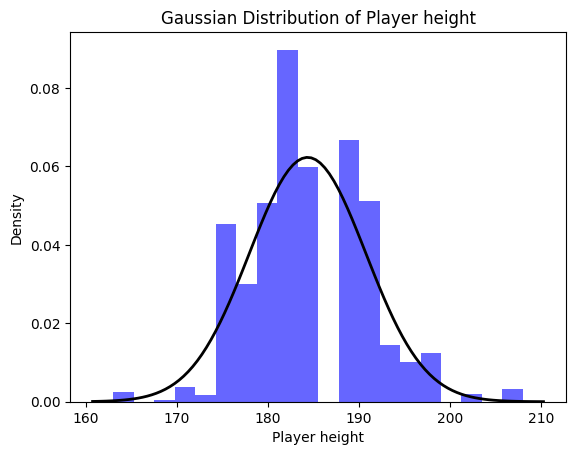

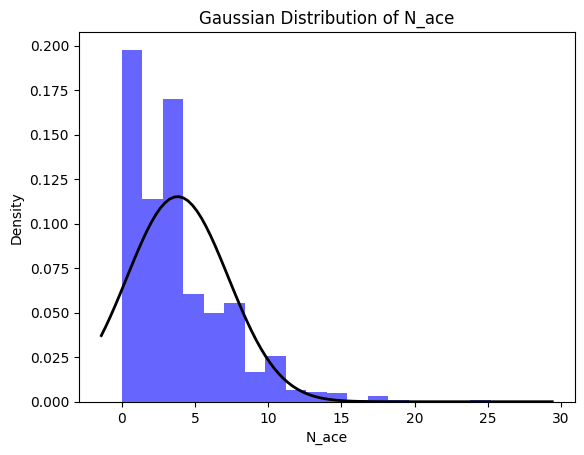

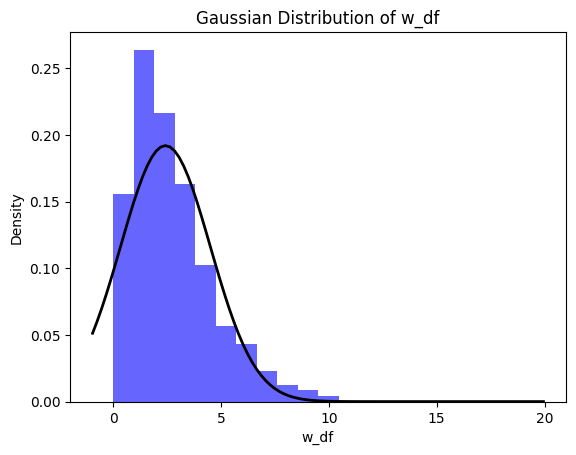

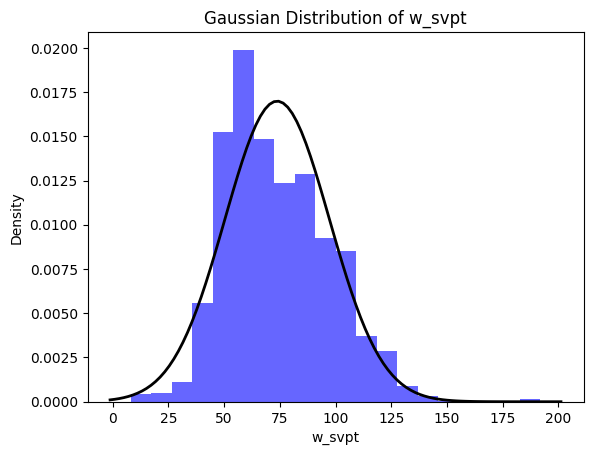

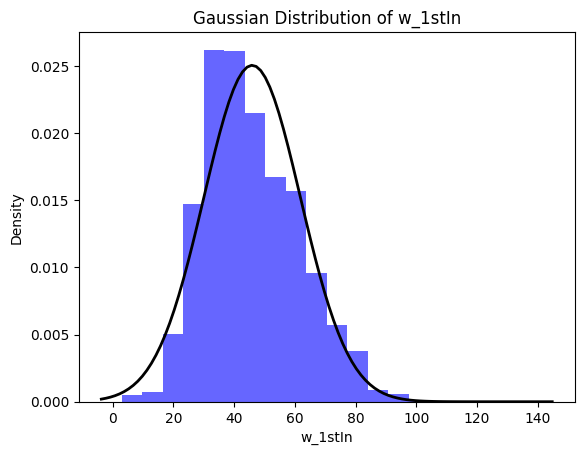

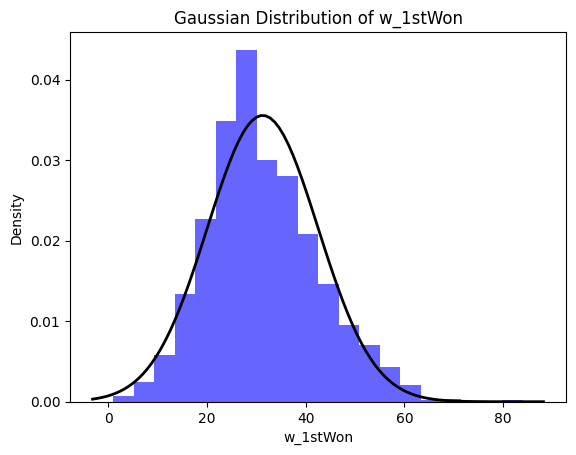

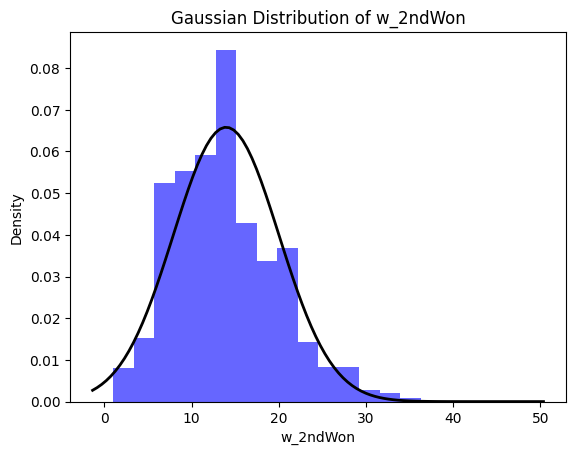

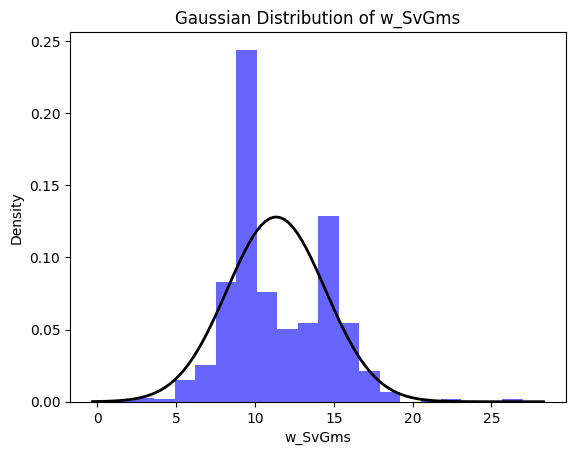

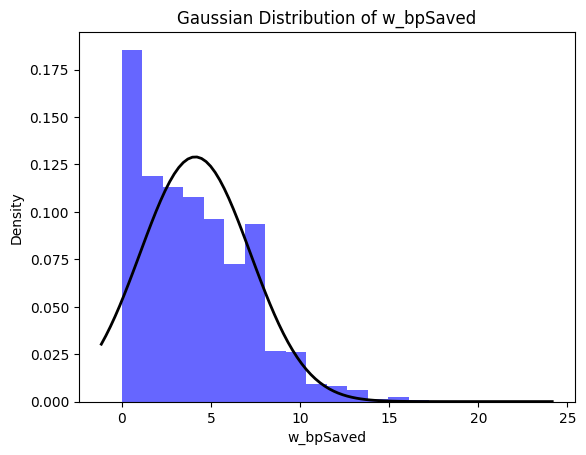

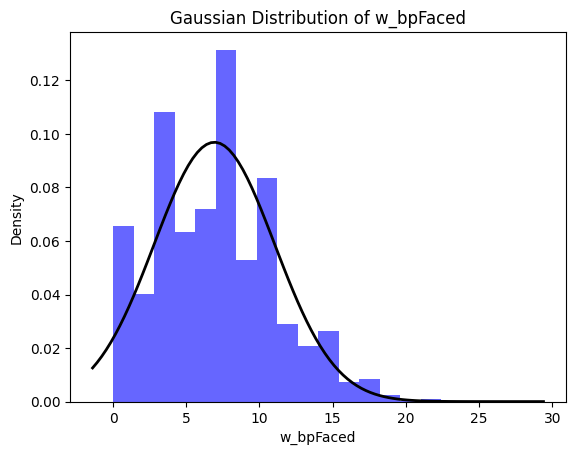

In [12]:
# inspecting the mean distribution for features that contains null values

for column_name in null_col:
    column_data = df[column_name].dropna()

    mu, std = norm.fit(column_data)


    plt.hist(column_data, bins=20, density=True, alpha=0.6, color='b')


    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.title('Gaussian Distribution of ' + column_name)

    # Show the plot
    plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

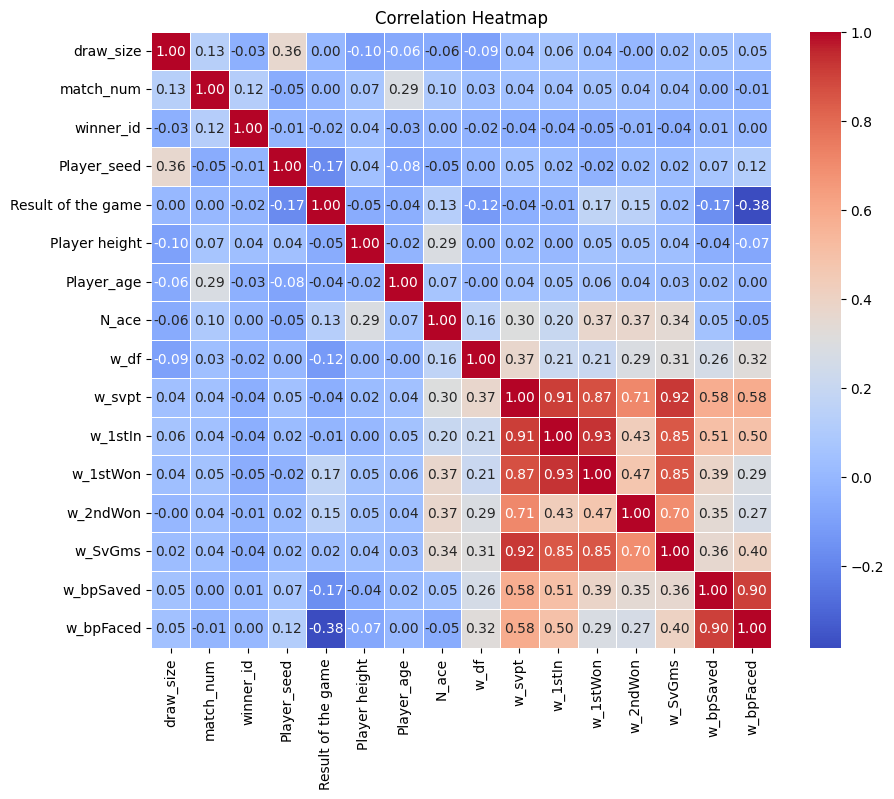

In [13]:
# inspecting the correlation by dropping null values
mf = df.dropna()
plt.figure(figsize=(10, 8))
sns.heatmap(mf[numerical_col].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')


Text(0.5, 1.0, 'Correlation Heatmap')

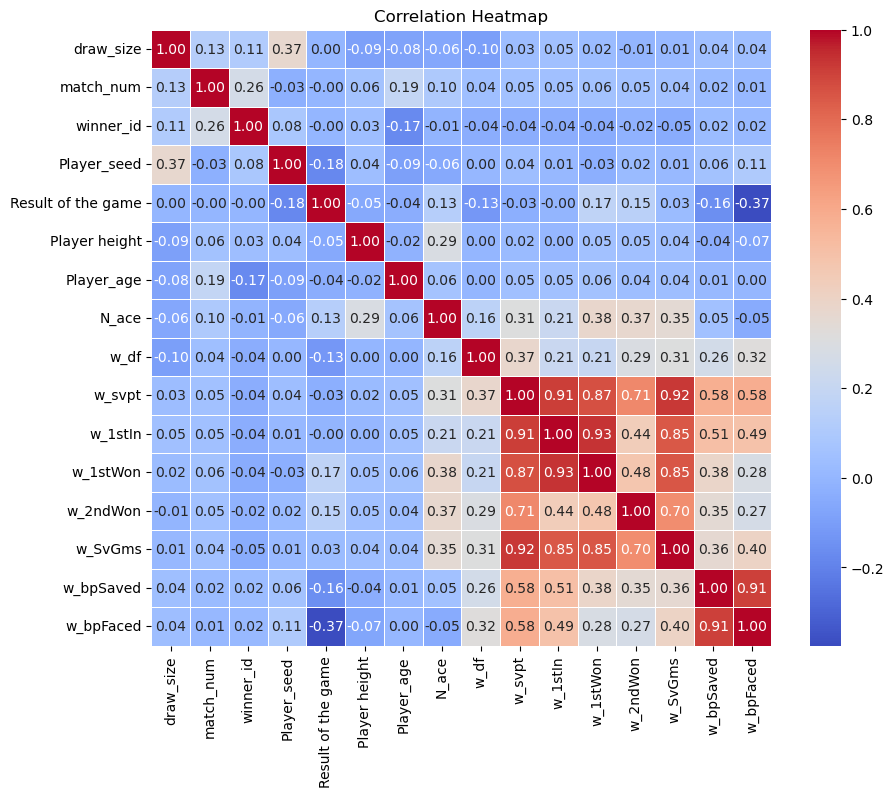

In [13]:
# filling null values with mean and inspecting their correlation
hf = df.copy(deep = True)
for col in null_col:
    hf[col] = hf[col].fillna(hf[col].mean())
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_col].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')


From the correlation that we listed above for numerical columns we observe that by dropping the null or filling the null with mean values doesn't effct the correlation. so we decide to fill the null values with means such that we have some more instances instead of dropping them.

From the correlation we found out that w_bpfaced feature is some what higly correlated with our target varible i.e., result of the game

In [14]:
# now we need to find the correlation to our target varible with categorical varibles

l = list()
for i  in categorical_columns:
    df[i] = df[i].astype('category')

    point_biserial_corr, _ = stats.pointbiserialr(df['Result of the game'].astype('category'), df[i].cat.codes)
    l.append(point_biserial_corr)

C:\Users\kishan'pc\AppData\Local\Temp\ipykernel_32020\1678982596.py:7: DeprecationWarning: Please use `pointbiserialr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  point_biserial_corr, _ = stats.pointbiserialr(df['Result of the game'].astype('category'), df[i].cat.codes)
C:\Users\kishan'pc\AppData\Local\Temp\ipykernel_32020\1678982596.py:7: DeprecationWarning: Please use `pointbiserialr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  point_biserial_corr, _ = stats.pointbiserialr(df['Result of the game'].astype('category'), df[i].cat.codes)
C:\Users\kishan'pc\AppData\Local\Temp\ipykernel_32020\1678982596.py:7: DeprecationWarning: Please use `pointbiserialr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  point_biserial_corr, _ = stats.pointbiserialr(df['Result of the game'].astype('category'), df[i].cat.codes)
C:\Users\Public\Anaconda\lib\site-packages\scipy\stats\_stats_py

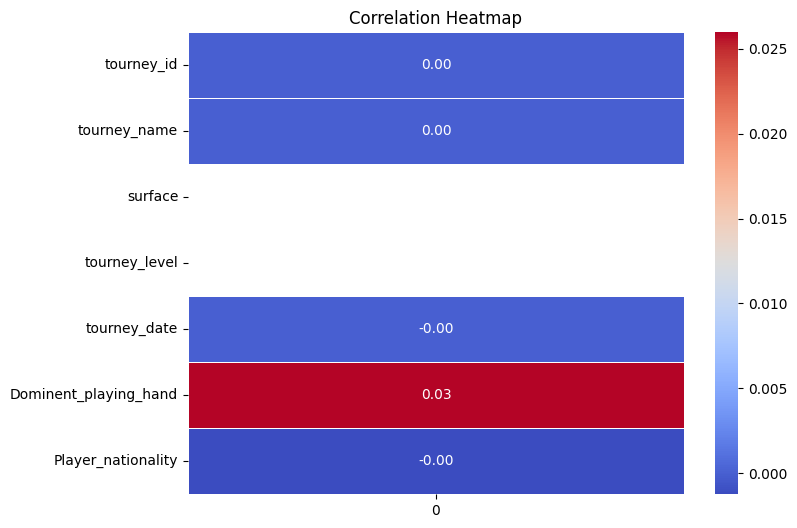

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


correlation_array = np.array(l).reshape(-1, 1)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_array, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,yticklabels=categorical_columns)

# Show plot
plt.title('Correlation Heatmap')
plt.show()


Out of all categorical columns Dominent_playing_hand fetaure is some what highly correlated to our target column i.e., result of the game

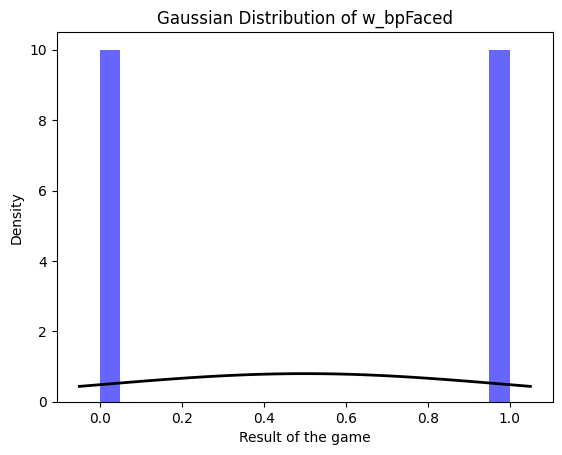

In [16]:
# Inspecting whether our target data is baised or unbaised


column_data = df['Result of the game'].dropna()
mu, std = norm.fit(column_data)


plt.hist(column_data, bins=20, density=True, alpha=0.6, color='b',)


xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Result of the game')
plt.ylabel('Density')
plt.title('Gaussian Distribution of ' + column_name)

# Show the plot
plt.show()


It shows that our target is not baised

Out of all fetaures we found out that the columns Dominent_playing_hand fetaure and w_bpfaced are some what higly correlated with our target incase of categorical and numerical columns respectively.

So we decide to develope mutiple regression model to check with one yields better results.
Following are our approcahes for developing multiple regression models
1. Multiple regression using all numerical fetaures
2. Multinominal regression using all categorical features
3. Linear regression using highly correaled column (i.e., w_bpfaced) out of all numerical columns
4. Logistic regression using highly correaled column (i.e., Dominent_playing_hand) out of all categorical columns
5. Multiple Regression with both higly correlated columns in numerical and categorical(i.e, w_bpfaced, Dominent_playing_hand respectively) 
6. Multiple Regression with all columns 

## 1. Multiple Regression using numerical columns

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = df[numerical_col].dropna()
X = data.drop(columns=['Result of the game'])  
y = data['Result of the game']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse =round(mean_squared_error(y_test, y_pred),3) 
r2 = round(r2_score(y_test, y_pred),3)


print("Mean Squared Error:", mse)
print("R-squared:", r2)
print(r2*100,'%')



Mean Squared Error: 0.171
R-squared: 0.314
31.4 %


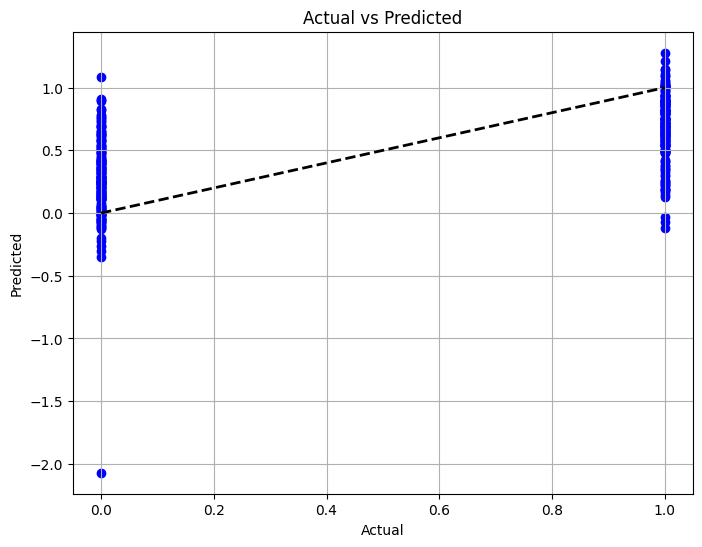

In [18]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


This code will plot a scatter plot where the x-axis represents the actual values and the y-axis represents the predicted values. The diagonal dashed line represents the line where actual values equal predicted values. A well-fitted model would have points closely clustered around this line.


## 2. Multinominal Regression using categorical columns

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = df[categorical_columns]
for i in list(data.columns):
    data[i] = data[i].astype('category').cat.codes
X = data
y = df['Result of the game']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy:", accuracy)
from sklearn.metrics import mean_absolute_error

mae = round(mean_absolute_error(y_test, y_pred),3)
print("Mean Absolute Error:", mae)

Accuracy: 0.52
Mean Absolute Error: 0.48


C:\Users\kishan'pc\AppData\Local\Temp\ipykernel_32020\3875610982.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].astype('category').cat.codes


## 3. Linear Regression with high_corr column in numerical features i.e., w_bpfaced

In [20]:
data = df[numerical_col].dropna()
X = data['w_bpFaced']
y = data['Result of the game']
X = X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse =round(mean_squared_error(y_test, y_pred),3) 
r2 = round(r2_score(y_test, y_pred),3)


print("Mean Squared Error:", mse)
print("R-squared:", r2)
print(r2*100,'%')


Mean Squared Error: 0.203
R-squared: 0.186
18.6 %


## 4. Logistic Regression with high_corr column in categorical columns i.e.,Dominent_playing_hand

In [21]:
categorical_columns

['tourney_id',
 'tourney_name',
 'surface',
 'tourney_level',
 'tourney_date',
 'Dominent_playing_hand',
 'Player_nationality']

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = df[categorical_columns]

X = data['Dominent_playing_hand'].astype('category').cat.codes
y = df['Result of the game']

X = X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_absolute_error

mae = round(mean_absolute_error(y_test, y_pred),3)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.472


## 5. Regression with both numerical and categorical highest correlation value

In [23]:
data = df[['w_bpFaced', 'Dominent_playing_hand', 'Result of the game']].dropna()
data['Dominent_playing_hand'] = data['Dominent_playing_hand'].astype('category').cat.codes

X = data[['w_bpFaced', 'Dominent_playing_hand']]
y = data['Result of the game']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse =round(mean_squared_error(y_test, y_pred),3) 
r2 = round(r2_score(y_test, y_pred),3)


print("Mean Squared Error:", mse)
print("R-squared:", r2)
print(r2*100,'%')


Mean Squared Error: 0.21
R-squared: 0.158
15.8 %


## 6. Regression with all columns

In [24]:
data = df.copy()
data = data.dropna()
data

tourney_id tourney_name surface  draw_size tourney_level tourney_date  \
0      2000-807  Mexico City    Clay         32             A   21-02-2000   
1      2000-359       Bogota    Clay         32             A     6/3/2000   
2      2000-359       Bogota    Clay         32             A     6/3/2000   
3      2000-409      Atlanta    Clay         32             A    10/4/2000   
4      2000-409      Atlanta    Clay         32             A    10/4/2000   
...         ...          ...     ...        ...           ...          ...   
1833  2021-5053     Belgrade    Clay         32             A   19-04-2021   
1834  2021-5053     Belgrade    Clay         32             A   19-04-2021   
1836  2021-0425    Barcelona    Clay         64             A   19-04-2021   
1839  2021-0425    Barcelona    Clay         64             A   19-04-2021   
1841  2021-0425    Barcelona    Clay         64             A   19-04-2021   

      match_num  winner_id  Player_seed  Result of the game  ... Player_age  \
0            28     102644            7                   1  ...  24.501027   
1            27     102950            4                   1  ...  22.995209   
2            30     101962            2                   1  ...  28.481862   
3            30     102776            8                   1  ...  23.978097   
4            28     102776            8                   1  ...  23.978097   
...         ...        ...          ...                 ...  ...        ...   
1833        299     104925            1                   0  ...  33.911020   
1834        294     105936            5                   0  ...  29.141684   
1836        289     105138            5                   0  ...  33.013005   
1839        296     106043            4                   0  ...  28.673511   
1841        299     105807            6                   0  ...  29.771389   

      N_ace w_df  w_svpt  w_1stIn  w_1stWon  w_2ndWon  w_SvGms  w_bpSaved  \
0       6.0  7.0    66.0     38.0      31.0      10.0     11.0        1.0   
1       1.0  0.0    34.0     18.0      17.0      11.0      7.0        0.0   
2       8.0  8.0    93.0     53.0      41.0      16.0     15.0        4.0   
3       4.0  5.0    77.0     35.0      24.0      25.0     12.0        3.0   
4       5.0  5.0    84.0     40.0      32.0      25.0     11.0        4.0   
...     ...  ...     ...      ...       ...       ...      ...        ...   
1833    2.0  6.0   116.0     72.0      44.0      21.0     16.0       10.0   
1834    1.0  4.0    57.0     30.0      18.0      17.0     10.0        4.0   
1836    1.0  1.0    65.0     47.0      29.0       7.0     10.0        0.0   
1839    0.0  4.0   102.0     70.0      44.0      13.0     15.0        5.0   
1841    4.0  1.0    53.0     44.0      24.0       3.0      8.0        6.0   

      w_bpFaced  
0           5.0  
1           0.0  
2          10.0  
3           5.0  
4           5.0  
...         ...  
1833       16.0  
1834        6.0  
1836        4.0  
1839       10.0  
1841       10.0  

[1743 rows x 23 columns]

In [25]:
for i in categorical_columns:
    data[i] = data[i].astype('category').cat.codes

X = data.drop('Result of the game', axis = 1)
y = data['Result of the game']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse =round(mean_squared_error(y_test, y_pred),3) 
r2 = round(r2_score(y_test, y_pred),3)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print(r2*100,'%')


Mean Squared Error: 0.198
R-squared: 0.209
20.9 %


From all regression models we found out that the model developed using all numerical columns have low mean squared error which indicates it is good model compare to all other models

So we decide to select the regression model which developed using all numerical columns

Now our focus is to tune this model by adjusting some hyper parameters.

###  1.Tuning the selected model using grid search to find best alpha values using Ridge regression model.

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


data = df[numerical_col].dropna()
X = data.drop(columns=['Result of the game'])  
y = data['Result of the game']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge()


param_grid = {'alpha': [0.1, 1.0, 10.0, 20.0, 30.0]}  
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


final_model = grid_search.best_estimator_


final_model.fit(X_train, y_train)


y_pred = final_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Best Parameters: {'alpha': 30.0}
Mean Squared Error: 0.1712746167199675
R-squared: 0.31444562631913375


###  2.Tuning the selected model using grid search to find best alpha values for Lasso regression model.

In [27]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


data = df[numerical_col].dropna()
X = data.drop(columns=['Result of the game'])  
y = data['Result of the game']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Lasso()


param_grid = {'alpha': [0.1, 1.0, 10.0, 20.0, 30.0]}  
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


final_model = grid_search.best_estimator_


final_model.fit(X_train, y_train)


y_pred = final_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Parameters: {'alpha': 0.1}
Mean Squared Error: 0.1634606385094043
R-squared: 0.34572233877476344


###  3.Tuning the selected model using random search to find best alpha values using Ridge regression model.

In [28]:



from sklearn.model_selection import RandomizedSearchCV


data = df[numerical_col].dropna()
X = data.drop(columns=['Result of the game'])  
y = data['Result of the game']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge()


param_grid = {'alpha': [0.1, 1.0, 10.0, 20.0, 30.0]}  
grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


final_model = grid_search.best_estimator_


final_model.fit(X_train, y_train)


y_pred = final_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

C:\Users\Public\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'alpha': 30.0}
Mean Squared Error: 0.1712746167199675
R-squared: 0.31444562631913375


###  4.Tuning the selected model using Random search to find best alpha values using Lasso regression model.

By doing hyper parameter tuning we found out that the model developed using lasso regression with help of using either gride or random search give improved version compare to the one without tuning

| Metrics | Previous | Now |
| ------- | ------ | ------ |
| Mean Square Error|  0.1714   | 0.1634 |
| R-square |          0.3137   | 0.3457 |


## Final Conclusion

Regression model using all numerical features is best fit to solve our problem statment

In [53]:
#Decision Tree 
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
#list all the columns
column_names = df.columns.tolist()
print(column_names)

['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'Player_seed', 'Result of the game', 'Dominent_playing_hand', 'Player height', 'Player_nationality', 'Player_age', 'N_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced']


In [54]:
#feature selection, we selected the appropirate independent and dependent variables for our model
table_1 = df[['Dominent_playing_hand', 'Player_nationality','Result of the game','Player_seed','Player_age','Player height','N_ace','w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced','surface', 'draw_size']]
print (table_1)

     Dominent_playing_hand Player_nationality  Result of the game  \
0                        L                ARG                   1   
1                        R                ESP                   1   
2                        R                MAR                   1   
3                        R                AUS                   1   
4                        R                AUS                   1   
...                    ...                ...                 ...   
1839                     R                ARG                   0   
1840                     R                ITA                   0   
1841                     R                ESP                   0   
1842                     R                GRE                   0   
1843                     R                AUS                   0   

      Player_seed  Player_age  Player height  N_ace  w_df  w_svpt  w_1stIn  \
0               7   24.501027          183.0    6.0   7.0    66.0     38.0   
1              

In [55]:
#Data Cleaning
#Remove the column which has NaN values. the number has reduced to 1743 from 1844
table_1_filter = table_1.dropna()
table_1_filter

Dominent_playing_hand Player_nationality  Result of the game  \
0                        L                ARG                   1   
1                        R                ESP                   1   
2                        R                MAR                   1   
3                        R                AUS                   1   
4                        R                AUS                   1   
...                    ...                ...                 ...   
1833                     R                SRB                   0   
1834                     R                SRB                   0   
1836                     R                ESP                   0   
1839                     R                ARG                   0   
1841                     R                ESP                   0   

      Player_seed  Player_age  Player height  N_ace  w_df  w_svpt  w_1stIn  \
0               7   24.501027          183.0    6.0   7.0    66.0     38.0   
1               4   22.995209          180.0    1.0   0.0    34.0     18.0   
2               2   28.481862          193.0    8.0   8.0    93.0     53.0   
3               8   23.978097          180.0    4.0   5.0    77.0     35.0   
4               8   23.978097          180.0    5.0   5.0    84.0     40.0   
...           ...         ...            ...    ...   ...     ...      ...   
1833            1   33.911020          188.0    2.0   6.0   116.0     72.0   
1834            5   29.141684          185.0    1.0   4.0    57.0     30.0   
1836            5   33.013005          183.0    1.0   1.0    65.0     47.0   
1839            4   28.673511          170.0    0.0   4.0   102.0     70.0   
1841            6   29.771389          188.0    4.0   1.0    53.0     44.0   

      w_1stWon  w_2ndWon  w_SvGms  w_bpSaved  w_bpFaced surface  draw_size  
0         31.0      10.0     11.0        1.0        5.0    Clay         32  
1         17.0      11.0      7.0        0.0        0.0    Clay         32  
2         41.0      16.0     15.0        4.0       10.0    Clay         32  
3         24.0      25.0     12.0        3.0        5.0    Clay         32  
4         32.0      25.0     11.0        4.0        5.0    Clay         32  
...        ...       ...      ...        ...        ...     ...        ...  
1833      44.0      21.0     16.0       10.0       16.0    Clay         32  
1834      18.0      17.0     10.0        4.0        6.0    Clay         32  
1836      29.0       7.0     10.0        0.0        4.0    Clay         64  
1839      44.0      13.0     15.0        5.0       10.0    Clay         64  
1841      24.0       3.0      8.0        6.0       10.0    Clay         64  

[1743 rows x 17 columns]

In [56]:
#From the table we created with feaure selection, we assigned the all the columns independent variable except the Result of the game, which would be our target variable
inputs_d = table_1_filter.drop('Result of the game', axis='columns')

In [57]:
inputs_d

Dominent_playing_hand Player_nationality  Player_seed  Player_age  \
0                        L                ARG            7   24.501027   
1                        R                ESP            4   22.995209   
2                        R                MAR            2   28.481862   
3                        R                AUS            8   23.978097   
4                        R                AUS            8   23.978097   
...                    ...                ...          ...         ...   
1833                     R                SRB            1   33.911020   
1834                     R                SRB            5   29.141684   
1836                     R                ESP            5   33.013005   
1839                     R                ARG            4   28.673511   
1841                     R                ESP            6   29.771389   

      Player height  N_ace  w_df  w_svpt  w_1stIn  w_1stWon  w_2ndWon  \
0             183.0    6.0   7.0    66.0     38.0      31.0      10.0   
1             180.0    1.0   0.0    34.0     18.0      17.0      11.0   
2             193.0    8.0   8.0    93.0     53.0      41.0      16.0   
3             180.0    4.0   5.0    77.0     35.0      24.0      25.0   
4             180.0    5.0   5.0    84.0     40.0      32.0      25.0   
...             ...    ...   ...     ...      ...       ...       ...   
1833          188.0    2.0   6.0   116.0     72.0      44.0      21.0   
1834          185.0    1.0   4.0    57.0     30.0      18.0      17.0   
1836          183.0    1.0   1.0    65.0     47.0      29.0       7.0   
1839          170.0    0.0   4.0   102.0     70.0      44.0      13.0   
1841          188.0    4.0   1.0    53.0     44.0      24.0       3.0   

      w_SvGms  w_bpSaved  w_bpFaced surface  draw_size  
0        11.0        1.0        5.0    Clay         32  
1         7.0        0.0        0.0    Clay         32  
2        15.0        4.0       10.0    Clay         32  
3        12.0        3.0        5.0    Clay         32  
4        11.0        4.0        5.0    Clay         32  
...       ...        ...        ...     ...        ...  
1833     16.0       10.0       16.0    Clay         32  
1834     10.0        4.0        6.0    Clay         32  
1836     10.0        0.0        4.0    Clay         64  
1839     15.0        5.0       10.0    Clay         64  
1841      8.0        6.0       10.0    Clay         64  

[1743 rows x 16 columns]

In [58]:
#Assigning the target variable as Result of the game
target = table_1_filter['Result of the game']
target

0       1
1       1
2       1
3       1
4       1
       ..
1833    0
1834    0
1836    0
1839    0
1841    0
Name: Result of the game, Length: 1743, dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
# Since decision tree takes only numberical values we change the playing hand and nationality to the number
le_Dominent_playing_hand = LabelEncoder()
le_Player_nationality = LabelEncoder()
le_surface = LabelEncoder()

In [62]:
inputs_d['Dominent_playing_hand_n'] = le_Dominent_playing_hand.fit_transform(inputs_d['Dominent_playing_hand'])
inputs_d['Player_nationality_n'] = le_Player_nationality.fit_transform(inputs_d['Player_nationality'])
inputs_d['surface_n'] = le_surface.fit_transform(inputs_d['surface'])
inputs_d.head()

Dominent_playing_hand Player_nationality  Player_seed  Player_age  \
0                     L                ARG            7   24.501027   
1                     R                ESP            4   22.995209   
2                     R                MAR            2   28.481862   
3                     R                AUS            8   23.978097   
4                     R                AUS            8   23.978097   

   Player height  N_ace  w_df  w_svpt  w_1stIn  w_1stWon  w_2ndWon  w_SvGms  \
0          183.0    6.0   7.0    66.0     38.0      31.0      10.0     11.0   
1          180.0    1.0   0.0    34.0     18.0      17.0      11.0      7.0   
2          193.0    8.0   8.0    93.0     53.0      41.0      16.0     15.0   
3          180.0    4.0   5.0    77.0     35.0      24.0      25.0     12.0   
4          180.0    5.0   5.0    84.0     40.0      32.0      25.0     11.0   

   w_bpSaved  w_bpFaced surface  draw_size  Dominent_playing_hand_n  \
0        1.0        5.0    Clay         32                        0   
1        0.0        0.0    Clay         32                        1   
2        4.0       10.0    Clay         32                        1   
3        3.0        5.0    Clay         32                        1   
4        4.0        5.0    Clay         32                        1   

   Player_nationality_n  surface_n  
0                     0          0  
1                    15          0  
2                    26          0  
3                     1          0  
4                     1          0

In [63]:
#Now since a new column has been created for playing hand and player nationality we will drop the old columns 
inputs_n = inputs_d.drop(['Dominent_playing_hand','Player_nationality','surface'],axis ='columns')
inputs_n

Player_seed  Player_age  Player height  N_ace  w_df  w_svpt  w_1stIn  \
0               7   24.501027          183.0    6.0   7.0    66.0     38.0   
1               4   22.995209          180.0    1.0   0.0    34.0     18.0   
2               2   28.481862          193.0    8.0   8.0    93.0     53.0   
3               8   23.978097          180.0    4.0   5.0    77.0     35.0   
4               8   23.978097          180.0    5.0   5.0    84.0     40.0   
...           ...         ...            ...    ...   ...     ...      ...   
1833            1   33.911020          188.0    2.0   6.0   116.0     72.0   
1834            5   29.141684          185.0    1.0   4.0    57.0     30.0   
1836            5   33.013005          183.0    1.0   1.0    65.0     47.0   
1839            4   28.673511          170.0    0.0   4.0   102.0     70.0   
1841            6   29.771389          188.0    4.0   1.0    53.0     44.0   

      w_1stWon  w_2ndWon  w_SvGms  w_bpSaved  w_bpFaced  draw_size  \
0         31.0      10.0     11.0        1.0        5.0         32   
1         17.0      11.0      7.0        0.0        0.0         32   
2         41.0      16.0     15.0        4.0       10.0         32   
3         24.0      25.0     12.0        3.0        5.0         32   
4         32.0      25.0     11.0        4.0        5.0         32   
...        ...       ...      ...        ...        ...        ...   
1833      44.0      21.0     16.0       10.0       16.0         32   
1834      18.0      17.0     10.0        4.0        6.0         32   
1836      29.0       7.0     10.0        0.0        4.0         64   
1839      44.0      13.0     15.0        5.0       10.0         64   
1841      24.0       3.0      8.0        6.0       10.0         64   

      Dominent_playing_hand_n  Player_nationality_n  surface_n  
0                           0                     0          0  
1                           1                    15          0  
2                           1                    26          0  
3                           1                     1          0  
4                           1                     1          0  
...                       ...                   ...        ...  
1833                        1                    35          0  
1834                        1                    35          0  
1836                        1                    15          0  
1839                        1                     0          0  
1841                        1                    15          0  

[1743 rows x 16 columns]

In [64]:
#Now indexing dependent variable to x and target variable to y 
from sklearn import tree
x = inputs_n
y = target

In [65]:
#spliting the data into test and train. For our data we are dividing it testing data to 80% and training data to 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [66]:
model = tree.DecisionTreeClassifier()

In [67]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.30945558739255014
R-squared (R2): -0.23807646826960993


In [69]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.3151862464183381
R-squared (R2): -0.2610038102746026


In [70]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [71]:
#Predicting the reuslt with below values for all the variable. It was successful to give the correct result
model.predict([[2,28.481862,193,8,8,93,53,41,16,15,4,10,32,1,26,0]])

C:\Users\Public\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [72]:
#optimization of the hyperparameter

from sklearn.model_selection import RandomizedSearchCV

In [73]:
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

from sklearn.tree import DecisionTreeClassifier, export_graphviz

DT_grid  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)

In [75]:
DT_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Public\Anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Public\Anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Public\Anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Public\Anaconda\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [76]:
#finding the best estimator
DT_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       min_samples_split=4)

In [77]:
model_rf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

In [78]:
model_rf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

In [81]:
print (f'Train Accuracy - : {model_rf.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {model_rf.score(X_test,y_test):.3f}')

Train Accuracy - : 0.720
Test Accuracy - : 0.628


In [82]:
#Random forest
# the packages required for the random forest 
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [83]:
x

Player_seed  Player_age  Player height  N_ace  w_df  w_svpt  w_1stIn  \
0               7   24.501027          183.0    6.0   7.0    66.0     38.0   
1               4   22.995209          180.0    1.0   0.0    34.0     18.0   
2               2   28.481862          193.0    8.0   8.0    93.0     53.0   
3               8   23.978097          180.0    4.0   5.0    77.0     35.0   
4               8   23.978097          180.0    5.0   5.0    84.0     40.0   
...           ...         ...            ...    ...   ...     ...      ...   
1833            1   33.911020          188.0    2.0   6.0   116.0     72.0   
1834            5   29.141684          185.0    1.0   4.0    57.0     30.0   
1836            5   33.013005          183.0    1.0   1.0    65.0     47.0   
1839            4   28.673511          170.0    0.0   4.0   102.0     70.0   
1841            6   29.771389          188.0    4.0   1.0    53.0     44.0   

      w_1stWon  w_2ndWon  w_SvGms  w_bpSaved  w_bpFaced  draw_size  \
0         31.0      10.0     11.0        1.0        5.0         32   
1         17.0      11.0      7.0        0.0        0.0         32   
2         41.0      16.0     15.0        4.0       10.0         32   
3         24.0      25.0     12.0        3.0        5.0         32   
4         32.0      25.0     11.0        4.0        5.0         32   
...        ...       ...      ...        ...        ...        ...   
1833      44.0      21.0     16.0       10.0       16.0         32   
1834      18.0      17.0     10.0        4.0        6.0         32   
1836      29.0       7.0     10.0        0.0        4.0         64   
1839      44.0      13.0     15.0        5.0       10.0         64   
1841      24.0       3.0      8.0        6.0       10.0         64   

      Dominent_playing_hand_n  Player_nationality_n  surface_n  
0                           0                     0          0  
1                           1                    15          0  
2                           1                    26          0  
3                           1                     1          0  
4                           1                     1          0  
...                       ...                   ...        ...  
1833                        1                    35          0  
1834                        1                    35          0  
1836                        1                    15          0  
1839                        1                     0          0  
1841                        1                    15          0  

[1743 rows x 16 columns]

In [84]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1833    0
1834    0
1836    0
1839    0
1841    0
Name: Result of the game, Length: 1743, dtype: int64

In [85]:
#training the data set to 70% train and 30% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=20)
x_train

Player_seed  Player_age  Player height  N_ace  w_df  w_svpt  w_1stIn  \
931             4   21.867214          175.0    0.0   1.0   122.0     94.0   
285             8   21.322382          183.0    4.0   3.0   107.0     52.0   
626             2   26.732375          185.0    0.0   1.0    43.0     27.0   
1560            7   29.065024          185.0    0.0   1.0    56.0     37.0   
995             5   24.405202          185.0    7.0   1.0    76.0     47.0   
...           ...         ...            ...    ...   ...     ...      ...   
973            12   26.318960          190.0   10.0   2.0    87.0     51.0   
1305           14   23.085558          183.0    3.0   2.0    84.0     47.0   
273             2   25.505818          183.0    9.0   1.0    57.0     30.0   
485             4   29.431896          175.0    0.0   0.0    61.0     42.0   
1439            3   29.119781          180.0    1.0   1.0    54.0     34.0   

      w_1stWon  w_2ndWon  w_SvGms  w_bpSaved  w_bpFaced  draw_size  \
931       56.0      12.0     16.0        7.0       12.0         32   
285       38.0      21.0     14.0       11.0       16.0         32   
626       22.0       9.0      7.0        2.0        2.0         32   
1560      22.0      14.0     10.0        1.0        3.0         48   
995       29.0      12.0     12.0        3.0        8.0         56   
...        ...       ...      ...        ...        ...        ...   
973       33.0      22.0     11.0        8.0        9.0         48   
1305      30.0      20.0     11.0        5.0        8.0         56   
273       25.0      14.0      9.0        3.0        3.0         32   
485       29.0      13.0     10.0        2.0        3.0         28   
1439      20.0      13.0     10.0        5.0        8.0         32   

      Dominent_playing_hand_n  Player_nationality_n  surface_n  
931                         1                    17          0  
285                         1                    17          0  
626                         0                    15          0  
1560                        1                     0          0  
995                         1                     0          0  
...                       ...                   ...        ...  
973                         1                    12          0  
1305                        1                    36          0  
273                         1                     8          0  
485                         1                    15          0  
1439                        1                     0          0  

[1220 rows x 16 columns]

In [86]:
#running the randomforest classfier on train data
from sklearn.ensemble import RandomForestClassifier
my_model = my_model = RandomForestClassifier(max_features=5, n_estimators=100)

In [87]:
rf = my_model.fit(x_train, y_train)
rf

RandomForestClassifier(max_features=5)

In [88]:
#hyperparameter Tuning 
from sklearn.model_selection import GridSearchCV

max_features_r = np.arange(1,6,1)
m_estimators_r = np.arange(10,210,10)
param_grid= dict(max_features=max_features_r, n_estimators=m_estimators_r)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [89]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [90]:
print(grid.best_params_,grid.best_score_)

{'max_features': 5, 'n_estimators': 180} 0.7622950819672132


In [91]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

max_features  n_estimators  Accuracy
0             1            10  0.690984
1             1            20  0.736885
2             1            30  0.724590
3             1            40  0.717213
4             1            50  0.709836

In [92]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10            0.690984
             20            0.736885
             30            0.724590
             40            0.717213
             50            0.709836
...                             ...
5            160           0.750820
             170           0.755738
             180           0.762295
             190           0.762295
             200           0.758197

[100 rows x 1 columns]

In [93]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

C:\Users\kishan'pc\AppData\Local\Temp\ipykernel_32020\1317805687.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  grid_pivot = grid_reset.pivot('max_features', 'n_estimators')


Accuracy                                                    \
n_estimators       10        20        30        40        50        60    
max_features                                                               
1             0.690984  0.736885  0.724590  0.717213  0.709836  0.719672   
2             0.722131  0.731967  0.724590  0.738525  0.746721  0.741803   
3             0.708197  0.732787  0.740164  0.740984  0.749180  0.747541   
4             0.731148  0.721311  0.749180  0.748361  0.753279  0.754098   
5             0.718033  0.731148  0.752459  0.740164  0.749180  0.751639   

                                                                          \
n_estimators       70        80        90        100       110       120   
max_features                                                               
1             0.728689  0.735246  0.740984  0.723770  0.733607  0.745082   
2             0.740164  0.744262  0.740164  0.759836  0.740984  0.737705   
3             0.756557  0.753279  0.750820  0.756557  0.748361  0.753279   
4             0.748361  0.758197  0.750820  0.741803  0.754918  0.758197   
5             0.744262  0.754918  0.759836  0.754918  0.752459  0.756557   

                                                                          \
n_estimators       130       140       150       160       170       180   
max_features                                                               
1             0.730328  0.735246  0.731148  0.735246  0.722131  0.736066   
2             0.746721  0.745902  0.740984  0.747541  0.756557  0.750000   
3             0.760656  0.753279  0.751639  0.762295  0.752459  0.750000   
4             0.745902  0.753279  0.753279  0.756557  0.754098  0.756557   
5             0.757377  0.750820  0.756557  0.750820  0.755738  0.762295   

                                  
n_estimators       190       200  
max_features                      
1             0.732787  0.726230  
2             0.741803  0.756557  
3             0.751639  0.759016  
4             0.759016  0.759016  
5             0.762295  0.758197

In [94]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

In [95]:
import plotly.graph_objects as go

# lable the x and y axis
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='Estimator')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='Maximum Features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning of Random forest', autosize=False,
                  width=600, height=600,
                  margin=dict(l=70, r=60, b=70, t=90))

fig.show()

In [96]:
#running the randomforest classfier on train data as hypertunning suggested
from sklearn.ensemble import RandomForestClassifier
my_model = my_model = RandomForestClassifier(max_features=5, n_estimators=180)

In [97]:
rf = my_model.fit(x_train, y_train)
rf

RandomForestClassifier(max_features=5, n_estimators=180)

In [98]:
y_pred = my_model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [99]:
y_pred_train = my_model.predict(x_train)
y_pred_train

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [100]:
# confusion matrix 
from sklearn.metrics import confusion_matrix,accuracy_score 

cm = confusion_matrix(y_pred, y_test)
cm


array([[182,  68],
       [ 68, 205]], dtype=int64)

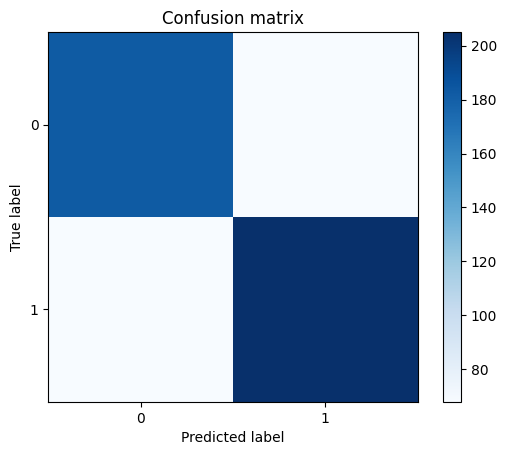

In [101]:
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(['0', '1'])
ax.set_yticklabels(['0', '1'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion matrix')
fig.colorbar(im)

In [102]:
acc_score=accuracy_score(y_pred, y_test)
acc_score

0.739961759082218

In [103]:
#roc curve 
from sklearn.metrics import roc_curve, auc, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,y_pred_train)
roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

1.0

In [104]:
#prediction probability 
rf_prob = rf.predict_proba(x_test)
rf_prob = rf_prob[:,1]
rf_prob

array([0.51111111, 0.09444444, 0.75555556, 0.63333333, 0.71111111,
       0.9       , 0.83888889, 0.75      , 0.71111111, 0.98888889,
       0.85      , 0.52777778, 0.05      , 0.11666667, 0.72777778,
       0.16111111, 0.88888889, 0.57222222, 0.35555556, 0.52777778,
       0.51111111, 0.40555556, 0.76666667, 0.52777778, 0.05      ,
       0.36666667, 0.58888889, 0.79444444, 0.15      , 0.06666667,
       0.24444444, 0.59444444, 0.28333333, 0.87777778, 0.57222222,
       0.35555556, 0.45555556, 0.22222222, 0.86666667, 0.98888889,
       0.05555556, 0.94444444, 0.86666667, 0.37222222, 0.98333333,
       0.21111111, 0.49444444, 0.55555556, 0.63888889, 0.22222222,
       0.48888889, 0.59444444, 0.83888889, 0.22777778, 0.42777778,
       0.35      , 0.65      , 0.69444444, 0.73888889, 0.82222222,
       0.38888889, 0.13333333, 0.47222222, 0.18333333, 0.25555556,
       0.78888889, 0.31666667, 0.3       , 0.5       , 0.73333333,
       0.68333333, 0.09444444, 0.60555556, 0.38333333, 0.42777

In [105]:
#computing AUROC 

rf_auc = roc_auc_score(y_test, rf_prob)
rf_auc

0.8442783882783883

In [106]:
rf_fpr, rf_tpr,_=roc_curve(y_test, rf_prob)

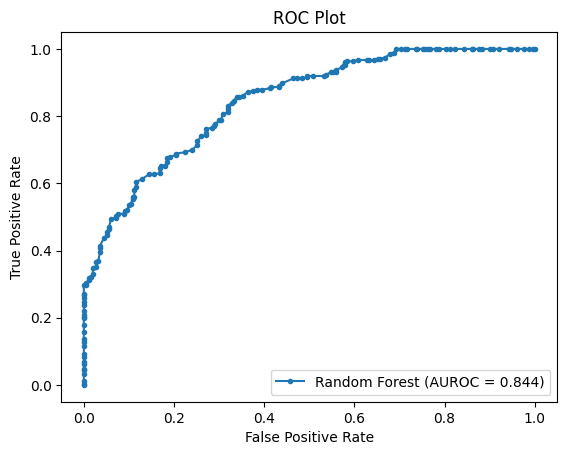

In [107]:
plt.plot(rf_fpr, rf_tpr, marker = '.', label ='Random Forest (AUROC = %0.3f)'% rf_auc)
plt.title("ROC Plot")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()